In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv ("https://raw.githubusercontent.com/kmschaffer/CUNYDataAnalytics/main/New_York_City_Leading_Causes_of_Death.csv")
#I downloaded this data set from NYC Open Data and saved it in my github.

In [3]:
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2009,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Other Race/ Ethnicity,.,.,.
1,2013,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,204,16.3,18.5
2,2012,"Assault (Homicide: Y87.1, X85-Y09)",M,Other Race/ Ethnicity,.,.,.
3,2007,Essential Hypertension and Renal Diseases (I10...,F,Not Stated/Unknown,5,.,.
4,2014,Cerebrovascular Disease (Stroke: I60-I69),F,White Non-Hispanic,418,29.5,15.6


In [4]:
df.tail()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
1089,2008,Influenza (Flu) and Pneumonia (J09-J18),M,Not Stated/Unknown,11,.,.
1090,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,86,.,.
1091,2008,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1464,172.4,220.4
1092,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1093,2009,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Asian and Pacific Islander,55,10.8,12.3


In [5]:
df['Year'].unique()
#I wanted to see the date range this data is from.

array([2009, 2013, 2012, 2007, 2014, 2008, 2011, 2010])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1094 non-null   int64 
 1   Leading Cause            1094 non-null   object
 2   Sex                      1094 non-null   object
 3   Race Ethnicity           1094 non-null   object
 4   Deaths                   1094 non-null   object
 5   Death Rate               1094 non-null   object
 6   Age Adjusted Death Rate  1094 non-null   object
dtypes: int64(1), object(6)
memory usage: 60.0+ KB


Death rate is the ratio of deaths to the population of a particular area or during a particular period of time, usually calculated as the number of deaths per one thousand people per year.  

Age adjusted death rate is a death rate that controls for the effects of differences in population age distributions.  When comparing across geographic areas, some method of ageadjusting is typically used to control for the influence that different population age distributions might have on health event rates. 

In [7]:
drop_cols= ["Death Rate", "Age Adjusted Death Rate"]
#I decided I wasn't going to use this data, just the total number of deaths.

In [8]:
df.drop(drop_cols, inplace = True, axis=1)

In [9]:
df["Deaths"] = df["Deaths"].replace('\.+', np.nan, regex=True)
#This code replaces the missing data (in this case it was .) in the Deaths column with NaN.

In [10]:
df1 = df.dropna()
#I created a new dataframe that does not include rows with missing data.

In [11]:
df1.count

<bound method DataFrame.count of       Year  ... Deaths
1     2013  ...    204
3     2007  ...      5
4     2014  ...    418
5     2009  ...     26
6     2013  ...    618
...    ...  ...    ...
1089  2008  ...     11
1090  2007  ...     86
1091  2008  ...   1464
1092  2014  ...     11
1093  2009  ...     55

[956 rows x 5 columns]>

In [12]:
nan_values = df1[df1["Deaths"].isna()]
print (nan_values)
#Double-checking that all of the NaN values were removed.

Empty DataFrame
Columns: [Year, Leading Cause, Sex, Race Ethnicity, Deaths]
Index: []


In [13]:
 df1["Deaths"] = df1["Deaths"].astype('int')
 #Now that the NaN is gone, I changed the data from string to integer.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1.dtypes
#double-checking that the above code worked.

Year               int64
Leading Cause     object
Sex               object
Race Ethnicity    object
Deaths             int64
dtype: object

In [15]:
df1["Deaths"].sum()
#Total number of deaths included in this dataset, across all Leading Causes.

424998

In [16]:
df1.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths
1,2013,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,204
3,2007,Essential Hypertension and Renal Diseases (I10...,F,Not Stated/Unknown,5
4,2014,Cerebrovascular Disease (Stroke: I60-I69),F,White Non-Hispanic,418
5,2009,Essential Hypertension and Renal Diseases (I10...,M,Asian and Pacific Islander,26
6,2013,Influenza (Flu) and Pneumonia (J09-J18),M,White Non-Hispanic,618


**RESEARCH QUESTION:  DID THE TOP 5 LEADING CAUSES OF DEATH CHANGE OVERTIME, OVERALL AND BY DIFFERENT DEMOGRAPHIC GROUPS?**

In [17]:
df1["Leading Cause"].unique()

array(['Influenza (Flu) and Pneumonia (J09-J18)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Assault (Homicide: Y87.1, X85-Y09)', 'All Other Causes',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Diabetes Mellitus (E10-E14)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       "Alzheimer's Disease (G30)",
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Viral Hepatitis (B15-B19)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       'Certain Conditions

In [18]:
df1.groupby("Leading Cause").Deaths.sum().nlargest(10)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)                      147551
Malignant Neoplasms (Cancer: C00-C97)                               106367
All Other Causes                                                     77999
Influenza (Flu) and Pneumonia (J09-J18)                              18678
Diabetes Mellitus (E10-E14)                                          13794
Chronic Lower Respiratory Diseases (J40-J47)                         13214
Cerebrovascular Disease (Stroke: I60-I69)                            12941
Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)      7467
Essential Hypertension and Renal Diseases (I10, I12)                  6955
Human Immunodeficiency Virus Disease (HIV: B20-B24)                   5436
Name: Deaths, dtype: int64

In [19]:
(147551+106367+77999+18678)/424998
#Figuring out the percentage of deaths that the top 4 causes covered.

0.8249332938037356

In [20]:
dfm=df1[df1['Sex']== "M"]

In [21]:
dff=df1[df1['Sex']== "F"]

In [22]:
dfm.replace({"Human Immunodeficiency Virus Disease (HIV: B20-B24)": "HIV and AIDS", "Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)":"Overdose", "Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)": 'Accidents Except for Drug Poisoning', "Cerebrovascular Disease (Stroke: I60-I69)":"Stroke", "Chronic Lower Respiratory Diseases (J40-J47)": "Chronic Lower Respiratory Diseases", "Diseases of Heart (I00-I09, I11, I13, I20-I51)": "Heart Disease", "Malignant Neoplasms (Cancer: C00-C97)": "Cancer", "Influenza (Flu) and Pneumonia (J09-J18)": "Flu & Pneumonia", "Diabetes Mellitus (E10-E14)": "Diabetes", 'Chronic Lower Respiratory Diseases (J40-J47)': "Chronic Lower Respiratory Diseases"}, inplace=True)
##Some of the names were too long to be clear in a chart so I re-named them.  I had trouble getting the name change to stick to the larger df, could only make it work with these updated df.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
dfm.groupby("Leading Cause").Deaths.sum().nlargest(10)

Leading Cause
Heart Disease                          68799
Cancer                                 52490
All Other Causes                       39056
Flu & Pneumonia                         8898
Diabetes                                6569
Chronic Lower Respiratory Diseases      5995
Stroke                                  5360
Accidents Except for Drug Poisoning     5191
Overdose                                3760
HIV and AIDS                            3633
Name: Deaths, dtype: int64

In [24]:
dff.replace({"Cerebrovascular Disease (Stroke: I60-I69)":"Stroke", "Alzheimer's Disease (G30)": "Alzeheimer's","Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)": "Accidents Except Drug Posioning" ,"Essential Hypertension and Renal Diseases (I10, I12)": "Hypertension and Renal Diseases" , "Diseases of Heart (I00-I09, I11, I13, I20-I51)": "Heart Disease", "Malignant Neoplasms (Cancer: C00-C97)": "Cancer", "Influenza (Flu) and Pneumonia (J09-J18)": "Flu & Pneumonia", "Diabetes Mellitus (E10-E14)": "Diabetes", 'Chronic Lower Respiratory Diseases (J40-J47)': "Chronic Lower Respiratory Diseases"}, inplace=True)
#Some of the names were too long to be clear in a chart so I re-named them.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
dff.groupby("Leading Cause").Deaths.sum().nlargest(10)

Leading Cause
Heart Disease                         78752
Cancer                                53877
All Other Causes                      38943
Flu & Pneumonia                        9780
Stroke                                 7581
Diabetes                               7225
Chronic Lower Respiratory Diseases     7219
Hypertension and Renal Diseases        4310
Alzeheimer's                           2980
Accidents Except Drug Posioning        2276
Name: Deaths, dtype: int64

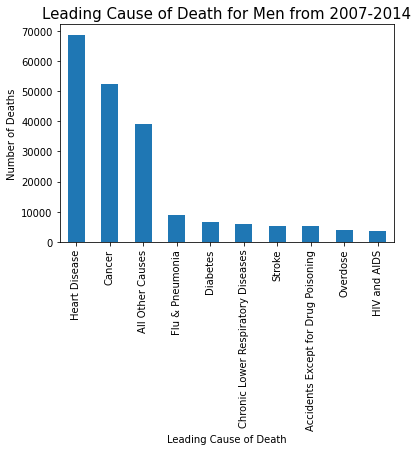

In [26]:
dfm.groupby("Leading Cause").Deaths.sum().nlargest(10).plot(kind='bar')
plt.xlabel("Leading Cause of Death")
plt.ylabel("Number of Deaths")
plt.title("Leading Cause of Death for Men from 2007-2014", size=15)
plt.show()

In [27]:
dff.groupby("Leading Cause").Deaths.sum().nlargest(10)

Leading Cause
Heart Disease                         78752
Cancer                                53877
All Other Causes                      38943
Flu & Pneumonia                        9780
Stroke                                 7581
Diabetes                               7225
Chronic Lower Respiratory Diseases     7219
Hypertension and Renal Diseases        4310
Alzeheimer's                           2980
Accidents Except Drug Posioning        2276
Name: Deaths, dtype: int64

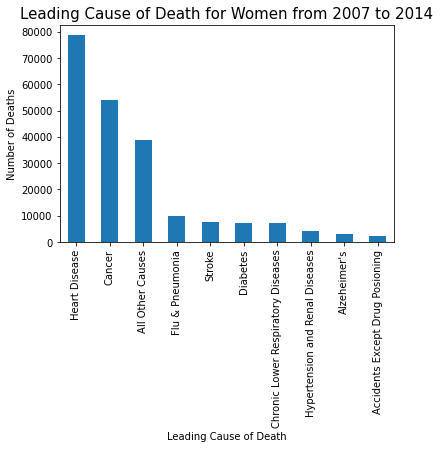

In [28]:
dff.groupby("Leading Cause").Deaths.sum().nlargest(10).plot(kind='bar')
plt.xlabel("Leading Cause of Death")
plt.ylabel("Number of Deaths")
plt.title("Leading Cause of Death for Women from 2007 to 2014", size=15)
plt.show()

In [29]:
#I wanted to look at the leading causes for all the years individually to see if there were any differences by year that was worth including in my analysis.

In [30]:
df2007=df1[df1['Year']== 2007]
df2008=df1[df1['Year']== 2008]
df2009=df1[df1['Year']== 2009]
df2010=df1[df1['Year']== 2010]
df2011=df1[df1['Year']== 2011]
df2012=df1[df1['Year']== 2012]
df2013=df1[df1['Year']== 2013]
df2014=df1[df1['Year']== 2014]

In [31]:
df2007.groupby("Leading Cause").Deaths.sum().nlargest(5)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    21441
Malignant Neoplasms (Cancer: C00-C97)             13249
All Other Causes                                   8142
Influenza (Flu) and Pneumonia (J09-J18)            2236
Diabetes Mellitus (E10-E14)                        1555
Name: Deaths, dtype: int64

In [32]:
df2008.groupby("Leading Cause").Deaths.sum().nlargest(5)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    21192
Malignant Neoplasms (Cancer: C00-C97)             13040
All Other Causes                                   8556
Influenza (Flu) and Pneumonia (J09-J18)            2297
Diabetes Mellitus (E10-E14)                        1631
Name: Deaths, dtype: int64

In [33]:
df2009.groupby("Leading Cause").Deaths.sum().nlargest(5)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    20084
Malignant Neoplasms (Cancer: C00-C97)             13174
All Other Causes                                   8445
Influenza (Flu) and Pneumonia (J09-J18)            2274
Diabetes Mellitus (E10-E14)                        1678
Name: Deaths, dtype: int64

In [34]:
df2010.groupby("Leading Cause").Deaths.sum().nlargest(5)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    17927
Malignant Neoplasms (Cancer: C00-C97)             13330
All Other Causes                                   9552
Influenza (Flu) and Pneumonia (J09-J18)            2448
Chronic Lower Respiratory Diseases (J40-J47)       1714
Name: Deaths, dtype: int64

In [35]:
df2011.groupby("Leading Cause").Deaths.sum().nlargest(5)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    16900
Malignant Neoplasms (Cancer: C00-C97)             13438
All Other Causes                                  10387
Influenza (Flu) and Pneumonia (J09-J18)            2491
Diabetes Mellitus (E10-E14)                        1770
Name: Deaths, dtype: int64

In [36]:
df2012.groupby("Leading Cause").Deaths.sum().nlargest(5)


Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    16731
Malignant Neoplasms (Cancer: C00-C97)             13401
All Other Causes                                  10708
Influenza (Flu) and Pneumonia (J09-J18)            2240
Diabetes Mellitus (E10-E14)                        1808
Name: Deaths, dtype: int64

In [37]:
df2013.groupby("Leading Cause").Deaths.sum().nlargest(5)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    16759
Malignant Neoplasms (Cancer: C00-C97)             13358
All Other Causes                                  11075
Influenza (Flu) and Pneumonia (J09-J18)            2472
Diabetes Mellitus (E10-E14)                        1843
Name: Deaths, dtype: int64

In [38]:
df2014.groupby("Leading Cause").Deaths.sum().nlargest(5)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)    16517
Malignant Neoplasms (Cancer: C00-C97)             13377
All Other Causes                                  11134
Influenza (Flu) and Pneumonia (J09-J18)            2220
Chronic Lower Respiratory Diseases (J40-J47)       1821
Name: Deaths, dtype: int64

Conclusion:  83% of all deaths are from heart disease, cancer, other causes, and the flu (which are the top four causes for both men and women).  There were smaller difference between genders on the top 4-10 causes of death. 

Similarities:  Stroke, Diabetes,  Chronic Lower Respiratory Diseases, and Accidents Except Drug Poisoning.

Differences
  
  For men: Overdoses and AIDS related complications

  For women: Hypertension, Alzheimer's.